<a href="https://www.kaggle.com/code/william2020/neural-networks-w-mlx-weights-backpropagation?scriptVersionId=189223942" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Neural Network Fundamentals with MLX: From Weights to Backpropagation 

Welcome to this step-by-step tutorial on building and evaluating a neural network using the MLX framework. In this notebook, we will guide you through the fundamentals of neural networks, covering everything from weight initialization and forward propagation to loss calculation and optimization. By the end of this tutorial, you will have a solid understanding of how to implement and evaluate a simple neural network for a regression task. Let’s dive in and explore the fascinating world of machine learning with MLX!


In [1]:
!pip install -q mlx

## Proper Imports

In [2]:
import mlx.core as mx
import mlx.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mlx.optimizers as optim

# Define the NN Model

## Don't worry, we'll break it down below

In [3]:
# Define the MLP Model
class MLP(nn.Module):
    def __init__(self, num_layers: int, input_dim: int, hidden_dim: int, output_dim: int):
        super().__init__()
        layer_sizes = [input_dim] + [hidden_dim] * num_layers + [output_dim]
        print("layer sizes:", layer_sizes)
        
        print("Layer sizes except the last:", layer_sizes[:-1])
        print("Layer sizes except the first:", layer_sizes[1:])
        
        self.layers = [
            nn.Linear(idim, odim)
            for idim, odim in zip(layer_sizes[:-1], layer_sizes[1:])
        ]
        print(self.layers[0].weight.shape)
        
        for i, layer in enumerate(self.layers):
            print("\n")
            print(f"Layer {i} weights shape: {layer.weight.shape}")
            print(f"Layer {i} weights:\n{layer.weight}")
            print(f"Layer {i} biases shape: {layer.bias.shape}")
            print(f"Layer {i} biases: {layer.bias}")

    def __call__(self, x):
        for i, l in enumerate(self.layers[:-1]):
            z = l(x)
            print(f"\nLayer {i} linear output (before ReLU):\n{z}")
            x = mx.maximum(z, 0.0)
            print(f"Layer {i} output (after ReLU):\n{x}")
        z = self.layers[-1](x)
        print(f"\nOutput layer linear output:\n{z}")
        return z
    
# Example usage
input_dim = 3
hidden_dim = 2
output_dim = 1 
num_layers = 1

# Initialize the model
model = MLP(num_layers, input_dim, hidden_dim, output_dim)

layer sizes: [3, 2, 1]
Layer sizes except the last: [3, 2]
Layer sizes except the first: [2, 1]
(2, 3)


Layer 0 weights shape: (2, 3)
Layer 0 weights:
array([[0.542931, 0.223817, 0.0142427],
       [-0.0571926, 0.476545, -0.440733]], dtype=float32)
Layer 0 biases shape: (2,)
Layer 0 biases: array([-0.545385, 0.0886448], dtype=float32)


Layer 1 weights shape: (1, 2)
Layer 1 weights:
array([[-0.159874, 0.00525504]], dtype=float32)
Layer 1 biases shape: (1,)
Layer 1 biases: array([0.295169], dtype=float32)


# Weights

The `Weights` matrix shape will always be (hidden_dim, input_dim). This is a 2D matrix where input_dim represents the number of input features, and hidden_dim represents the number of neurons in the hidden layer.

Weight Matrix shape - i.e. (hidden_dim, input_dim)
   * `hidden_dim` is the number of columns (or neurons in the hidden layer)
   * `input_dim` is the number of rows (or features). Each column of the weight matrix corresponds to one input feature.

# Bias

The `Bias` vector shape will always be (1, hidden_dim). This is a 1D array where the number of elements is equal to hidden_dim.

## Let's break this down to show exactly what happens when a input is put through the network.

We have a input X (array) of 3 features:

In [4]:
X = mx.array(np.array([[0.5, -1.2, 3.3]]).astype(np.float32))
print("Input X:\n", X)

Input X:
 array([[0.5, -1.2, 3.3]], dtype=float32)


The `weight` matrix and `bias` for the first layer was created when we intialized our model:

In [5]:
print("weight shape:", model.layers[0].weight.shape)

W_0 = model.layers[0].weight
print("weight:\n", W_0)

B_0 = model.layers[0].bias
print("bias:\n", B_0)

weight shape: (2, 3)
weight:
 array([[0.542931, 0.223817, 0.0142427],
       [-0.0571926, 0.476545, -0.440733]], dtype=float32)
bias:
 array([-0.545385, 0.0886448], dtype=float32)


Matrix Multiplication is used in NN's to compute the weighted sum of inputs for each neuron in a layer.

* Input X is of one dimension (1, input_dim) - an array.

* The weight matrix is transposed, `mx.transpose(W_0)`, to properly align the weight matrix with the single dimentional input (X).
    * The rows now become columns. before transpose: (2, 3), after transposing: (3, 2)

In [6]:
W_0T = mx.transpose(W_0)
print("W Transposed:\n ", W_0T)

W Transposed:
  array([[0.542931, -0.0571926],
       [0.223817, 0.476545],
       [0.0142427, -0.440733]], dtype=float32)


Now, we'll do the matrix multiplication with `X` and `W_0T`!

In [7]:
print("input:\n", X)

print("\nW transposed:\n", W_0T)

Z_0 = mx.matmul(X, W_0T)

print("\nouput:\n", Z_0)

input:
 array([[0.5, -1.2, 3.3]], dtype=float32)

W transposed:
 array([[0.542931, -0.0571926],
       [0.223817, 0.476545],
       [0.0142427, -0.440733]], dtype=float32)

ouput:
 array([[0.0498865, -2.05487]], dtype=float32)


## Let's break it down:

In [8]:
from IPython.display import display, Markdown

# Extract and format the values for the first column
x0_w0_0 = X[0][0].item() * W_0T[0][0].item()
x1_w1_0 = X[0][1].item() * W_0T[1][0].item()
x2_w2_0 = X[0][2].item() * W_0T[2][0].item()
sum_result_0 = x0_w0_0 + x1_w1_0 + x2_w2_0

# Extract and format the values for the second column
x0_w0_1 = X[0][0].item() * W_0T[0][1].item()
x1_w1_1 = X[0][1].item() * W_0T[1][1].item()
x2_w2_1 = X[0][2].item() * W_0T[2][1].item()
sum_result_1 = x0_w0_1 + x1_w1_1 + x2_w2_1

display(Markdown("What you see there is each element in the Input array being multiplied with an element in a column."))

display(Markdown("### 1A. Multiply with the first column:"))
display(Markdown(f"* **{X[0][0].item()} * {W_0T[0][0].item():.3f} = {x0_w0_0:.3f}**"))
display(Markdown(f"* **{X[0][1].item():.3f} * {W_0T[1][0].item():.3f} = {x1_w1_0:.3f}**"))
display(Markdown(f"* **{X[0][2].item():.3f} * {W_0T[2][0].item():.3f} = {x2_w2_0:.3f}**"))

display(Markdown("### 2A. Sum these products:\n"))
display(Markdown(f"* **{x0_w0_0:.3f} + {x1_w1_0:.3f} + {x2_w2_0:.3f} = {sum_result_0:.3f}**"))

display(Markdown("\n### 1B. Multiply with the second column:"))
display(Markdown(f"* **{X[0][0].item()} * {W_0T[0][1].item():.3f} = {x0_w0_1:.3f}**"))
display(Markdown(f"* **{X[0][1].item():.3f} * {W_0T[1][1].item():.3f} = {x1_w1_1:.3f}**"))
display(Markdown(f"* **{X[0][2].item():.3f} * {W_0T[2][1].item():.3f} = {x2_w2_1:.3f}**"))

display(Markdown("### 2B. Sum these products:\n"))
display(Markdown(f"* **{x0_w0_1:.3f} + {x1_w1_1:.3f} + {x2_w2_1:.3f} = {sum_result_1:.3f}** "))

display(Markdown("\n\n"))
display(Markdown("### As you can see, doing the dot product manually we can make sure the sum_results match the actual mx.matmul dot product:  "))


display(Markdown(f"**sum_result_0 = {sum_result_0:.3f}**"))
display(Markdown(f"**sum_result_1 = {sum_result_1:.3f}**"))
display(Markdown(f"**mx.matmul result from above, Z_0 = {Z_0}**"))



What you see there is each element in the Input array being multiplied with an element in a column.

### 1A. Multiply with the first column:

* **0.5 * 0.543 = 0.271**

* **-1.200 * 0.224 = -0.269**

* **3.300 * 0.014 = 0.047**

### 2A. Sum these products:


* **0.271 + -0.269 + 0.047 = 0.050**


### 1B. Multiply with the second column:

* **0.5 * -0.057 = -0.029**

* **-1.200 * 0.477 = -0.572**

* **3.300 * -0.441 = -1.454**

### 2B. Sum these products:


* **-0.029 + -0.572 + -1.454 = -2.055** 

### As you can see, doing the dot product manually we can make sure the sum_results match the actual mx.matmul dot product:  

**sum_result_0 = 0.050**

**sum_result_1 = -2.055**

**mx.matmul result from above, Z_0 = array([[0.0498865, -2.05487]], dtype=float32)**

Finally, we add the `Bias` to Z_0

In [9]:
print("Bias:\n", B_0)

print("\nDot products:\n", Z_0)


Z_0 = Z_0 + B_0
print("\nAdding Bias to Dot Product:\nThe Linear Output:\n", Z_0)

Bias:
 array([-0.545385, 0.0886448], dtype=float32)

Dot products:
 array([[0.0498865, -2.05487]], dtype=float32)

Adding Bias to Dot Product:
The Linear Output:
 array([[-0.495499, -1.96622]], dtype=float32)


You'll see above, we added the first element of the bias to the first element of the dot products and the same for the 2nd element of each to get the Lienar output.

After the matrix multiplication (dot product) and addition of the bias, the resulting output is passed through an activation function. 

# ReLU activation function

The purpose of the `activation function` is to introduce non-linearity into the model, allowing it to learn more complex patterns.

This operation compares each element of  Z_0  with 0 and returns the maximum of the two values.

In [10]:
relu_output = mx.maximum(Z_0, 0.0)

relu_output

array([[0, 0]], dtype=float32)

Now, that we have the output of the ReLU fuction above.  We pass this through our next layer.  Let's grab the next layers weights and biases.

In [11]:
print("weight shape:", model.layers[1].weight.shape)

W_1 = model.layers[1].weight
print("weight:\n", W_1)

B_1 = model.layers[1].bias
print("bias:\n", B_1)

weight shape: (1, 2)
weight:
 array([[-0.159874, 0.00525504]], dtype=float32)
bias:
 array([0.295169], dtype=float32)


We take the ReLU output of the first activation function and pass it through the 2nd layer and apply matrix multiplication.

Note:

1. First, we'll Transpose W_1 to align with matrix muliplication with the `relu_output` 
2. Since this is a single hidden layer network, this will be going towards the output for prediction.

In [12]:
# Transpose W_1.
W_1T = mx.transpose(W_1)
print("W_1T Transposed:\n", W_1T)

# Relu output from first hidden layer:
print("relu_output:\n", relu_output)


W_1T Transposed:
 array([[-0.159874],
       [0.00525504]], dtype=float32)
relu_output:
 array([[0, 0]], dtype=float32)


In [13]:
print(f"{relu_output[0][0].item()} * {W_1T[0][0].item()} = {relu_output[0][0].item() * W_1T[0][0].item()}")
sum_result_2 = relu_output[0][0].item() * W_1T[0][0].item()
print("sum result 2: ",sum_result_2)

print(f"{relu_output[0][1].item()} * {W_1T[1][0].item()} = {relu_output[0][1].item() * W_1T[1][0].item()}")
sum_result_3 = (relu_output[0][1].item() * W_1T[1][0].item())
print("sum result 3: ",sum_result_3)

print("\nAdding both sum results together to get the dot product:")
output = sum_result_2 + sum_result_3
print("Dot product:", output)

0.0 * -0.1598738431930542 = -0.0
sum result 2:  -0.0
0.0 * 0.0052550435066223145 = 0.0
sum result 3:  0.0

Adding both sum results together to get the dot product:
Dot product: 0.0


## Apply MatMul:

In [14]:
Z_1 = mx.matmul(relu_output, W_1T)
print("Dot product (Z_1) before adding bias:\n\n", Z_1)

Dot product (Z_1) before adding bias:

 array([[0]], dtype=float32)


## Adding Bias:

In [15]:
print("\nDot product:\n\n", Z_1)

print("\nBias:\n", B_1)

Z_1 += B_1
print("\nOutput layer linear output (Z_1):\n", Z_1)


Dot product:

 array([[0]], dtype=float32)

Bias:
 array([0.295169], dtype=float32)

Output layer linear output (Z_1):
 array([[0.295169]], dtype=float32)


Now, to see if we did everything correctly.  We can match our hand written prediction under  `Output layer linear output` from above with the actual prediction when we call the `model`.

Let's try it!

In [16]:
output = model(X)
print("Model output:", output)


Layer 0 linear output (before ReLU):
array([[-0.495499, -1.96622]], dtype=float32)
Layer 0 output (after ReLU):
array([[0, 0]], dtype=float32)

Output layer linear output:
array([[0.295169]], dtype=float32)
Model output: array([[0.295169]], dtype=float32)


As you can see, our model output array maches our prediction, `array([[-0.493743]]`

**Ours:**

    Dot product:

     array([[-1.05947]], dtype=float32)

    Bias:
     array([0.565723], dtype=float32)

    Output layer linear output (Z_1):
     array([[-0.493743]], dtype=float32)
     
**Models prediction:**

    Layer 0 linear output (before ReLU):
    array([[1.6477, -1.99371]], dtype=float32)
    Layer 0 output (after ReLU):
    array([[1.6477, 0]], dtype=float32)

    Output layer linear output:
    array([[-0.493743]], dtype=float32)
    Model output: array([[-0.493743]], dtype=float32)

A neat way to check the models parameters (weights and biases for each layer) is `model.parameters()`

In [17]:
mx.eval(model.parameters())
model.parameters()

{'layers': [{'weight': array([[0.542931, 0.223817, 0.0142427],
          [-0.0571926, 0.476545, -0.440733]], dtype=float32),
   'bias': array([-0.545385, 0.0886448], dtype=float32)},
  {'weight': array([[-0.159874, 0.00525504]], dtype=float32),
   'bias': array([0.295169], dtype=float32)}]}

## Loss functions

Now that we have our prediction, let's introduce the Loss function into the mix here. We can try a few different ones.

Loss functions:

1. Mean Squared Error Loss

2. Cross Entropy Loss

In [18]:
def mse_loss(y_pred, y_true):
    return mx.mean((y_pred - y_true) ** 2)

def loss_fn(model, X, y):
    return mx.mean(nn.losses.cross_entropy(model(X), y))

In [19]:
# Dummy ground truth value
y_true = mx.array(np.array([[0.2345]]).astype(np.float32))
print("dummy ground truth:\n", y_true)

print("\npredicted value from above:\n", Z_1 )


dummy ground truth:
 array([[0.2345]], dtype=float32)

predicted value from above:
 array([[0.295169]], dtype=float32)


Calculate the loss - how far is our prediction from the ground truth?

1. Mean Error Squared:

    * Measures how close the predicted values are to the ground truth.

In [20]:
loss = mse_loss(Z_1, y_true)
print(f"Loss: {loss.item():.3f}")

Loss: 0.004


2. Cross Entropy Loss:

When to Use: Use CE for classification problems where the goal is to predict the probability distribution over a set of classes. Cross Ent is typically used in the `Transformers` arcitecture, like in `BERT` and `GPT` for sequence-to-sequence tasks.

   *  Measures how well the predicted class probabilities match the true class labels.

In [21]:
ce_loss = loss_fn(model, X, y_true)
print(f"\nloss: {ce_loss.item():.3f}")


Layer 0 linear output (before ReLU):
array([[-0.495499, -1.96622]], dtype=float32)
Layer 0 output (after ReLU):
array([[0, 0]], dtype=float32)

Output layer linear output:
array([[0.295169]], dtype=float32)

loss: 0.226


### After the loss is calculated, the next step is to perform backpropagation and optimization. 

#### Backpropagation is the process of calculating the gradient of the loss function with respect to each weight and bias in the network. These gradients indicate how much the loss would change with a small change in each parameter. 

Note: we'll be using the cross entropy loss function going forward.

The `mlx.nn.value_and_grad()` function is a convenience function to get the gradient of a loss with respect to the trainable parameters of a model. This should not be confused with `mlx.core.value_and_grad()`.

In [22]:
# Let's print out what the model and loss.
print("model:\n", model)
print(f"Loss: {ce_loss.item():.3f}")

# Compute the loss and gradients
print("\n\nPer our print statments in our forward method: ")
loss_and_grad_fn = nn.value_and_grad(model, loss_fn)
loss, grads = loss_and_grad_fn(model, X, y_true)

print(f"\n\nGrads: {grads}")

print("\nLet's break down the Grads (gradiants)")

model:
 MLP(
  (layers.0): Linear(input_dims=3, output_dims=2, bias=True)
  (layers.1): Linear(input_dims=2, output_dims=1, bias=True)
)
Loss: 0.226


Per our print statments in our forward method: 

Layer 0 linear output (before ReLU):
array([[-0.495499, -1.96622]], dtype=float32)
Layer 0 output (after ReLU):
array([[0, 0]], dtype=float32)

Output layer linear output:
array([[0.295169]], dtype=float32)


Grads: {'layers': [{'weight': array([[0, 0, 0],
       [0, 0, 0]], dtype=float32), 'bias': array([0, 0], dtype=float32)}, {'weight': array([[0, 0]], dtype=float32), 'bias': array([0.7655], dtype=float32)}]}

Let's break down the Grads (gradiants)


In [23]:
first_layer_grads = grads['layers'][0]
first_layer_grads

{'weight': array([[0, 0, 0],
        [0, 0, 0]], dtype=float32),
 'bias': array([0, 0], dtype=float32)}

In [24]:
# Print gradients for each layer
for i, layer in enumerate(model.layers):
    print(f"Gradients of Layer {i} weights:\n{grads['layers'][i]['weight']}")
    print(f"\n\nGradients of Layer {i} biases:\n{grads['layers'][i]['bias']}")

Gradients of Layer 0 weights:
array([[0, 0, 0],
       [0, 0, 0]], dtype=float32)


Gradients of Layer 0 biases:
array([0, 0], dtype=float32)
Gradients of Layer 1 weights:
array([[0, 0]], dtype=float32)


Gradients of Layer 1 biases:
array([0.7655], dtype=float32)


# Instantiate the optimizer

Now, that we have our gradiants, we are going to define our optimizer, which is reponsibly for updating the model's params (weights and biases) to miniize the loss function next iteration.

## We'll use  Stochastic Gradient Descent (SGD) and define a learning rate that the optimizer will use learning rate to control the step size of the parameter updates.

In [25]:
learning_rate = 0.1

optimizer = optim.SGD(learning_rate=learning_rate)

Let's take a look at the original weights and biases that we talkd about earlier:

In [26]:
print(f"layer 0 weight:\n{W_0}")

print(f"\nlayer 0 bias:\n{B_0}")

print(f"\nlayer 1 weights:\n{W_1}")
      
print(f"\nlayer 1 bias:\n{B_1}")

layer 0 weight:
array([[0.542931, 0.223817, 0.0142427],
       [-0.0571926, 0.476545, -0.440733]], dtype=float32)

layer 0 bias:
array([-0.545385, 0.0886448], dtype=float32)

layer 1 weights:
array([[-0.159874, 0.00525504]], dtype=float32)

layer 1 bias:
array([0.295169], dtype=float32)


## Now, we update these with the `optimizer.update()` method and print out the updated weights and baises for the layers:

In [27]:
optimizer.update(model, grads)

for i, layer in enumerate(model.layers):
    print(f"\nUpdated Layer {i} weights:\n{layer.weight}")
    print(f"Updated Layer {i} biases:\n{layer.bias}")


Updated Layer 0 weights:
array([[0.542931, 0.223817, 0.0142427],
       [-0.0571926, 0.476545, -0.440733]], dtype=float32)
Updated Layer 0 biases:
array([-0.545385, 0.0886448], dtype=float32)

Updated Layer 1 weights:
array([[-0.159874, 0.00525504]], dtype=float32)
Updated Layer 1 biases:
array([0.218619], dtype=float32)


## We can now take a look at the models updated weights/biases - which should match what we just updated from above by using the `model.parameters()` method

In [28]:
model.parameters()

{'layers': [{'weight': array([[0.542931, 0.223817, 0.0142427],
          [-0.0571926, 0.476545, -0.440733]], dtype=float32),
   'bias': array([-0.545385, 0.0886448], dtype=float32)},
  {'weight': array([[-0.159874, 0.00525504]], dtype=float32),
   'bias': array([0.218619], dtype=float32)}]}

## Next, forcing evaluation provides immediate feedback on the results of the computations, which is useful for debugging and ensuring that the model is being updated correctly.

In [29]:
# Force a graph evaluation
mx.eval(model.parameters(), optimizer.state)

# We can actually calculate the accuracy of the models predictions to see how well it did!  

Instead of using the Cross Entropy loss typically used for classification problems, we will define an evaluation function that uses Mean Squared Error (MSE) since we are dealing with a regression-like problem.

In [30]:

def eval_fn(model, X, y):
    y_pred = model(X)
    # computes the Mean Squared Error between the predicted output y_pred and the ground truth y.
    return mse_loss(y_pred, y)

We will be putting in the input, which is `X` and evaluating with the ground truth `(y_true)`

In [31]:
print(f"\n\nGround truth:\n{y_true}")

# Calculate accuracy
accuracy = eval_fn(model, X, y_true)
print(f"\naccuracy: {accuracy.item():.3f}")



Ground truth:
array([[0.2345]], dtype=float32)

Layer 0 linear output (before ReLU):
array([[-0.495499, -1.96622]], dtype=float32)
Layer 0 output (after ReLU):
array([[0, 0]], dtype=float32)

Output layer linear output:
array([[0.218619]], dtype=float32)

accuracy: 0.000


What we get is an accuracy (MSE) between:

   * ground truth
   * Output layer linear output
   
 In this case. The lower the number, the more accurate our prediction is to the ground truth.  Obviously, the higher the further away.

# Let's put it all together!

## We'll use the individual compartments we used above and put them into on cell.

In [32]:
# The NN Model
class MLP(nn.Module):
    def __init__(self, num_layers: int, input_dim: int, hidden_dim: int, output_dim: int):
        super().__init__()
        layer_sizes = [input_dim] + [hidden_dim] * num_layers + [output_dim]
        self.layers = [
            nn.Linear(idim, odim)
            for idim, odim in zip(layer_sizes[:-1], layer_sizes[1:])
        ]

    def __call__(self, x):
        for l in self.layers[:-1]:
            z = l(x)
            x = mx.maximum(z, 0.0)
        return self.layers[-1](x)

# Example usage
input_dim = 3
hidden_dim = 2
output_dim = 1 
num_layers = 1

# Initialize the model
model = MLP(num_layers, input_dim, hidden_dim, output_dim)

# Loss MSE functions
def mse_loss(y_pred, y_true):
    return mx.mean((y_pred - y_true) ** 2)

def loss_fn(model, X, y):
    y_pred = model(X)
    return mse_loss(y_pred, y)

# Dummy ground truth value
y_true = mx.array(np.array([[0.2345]]).astype(np.float32))
X = mx.array(np.array([[0.5, -1.2, 3.3]]).astype(np.float32))

# Instantiate the optimizer with a smaller learning rate
learning_rate = 0.001
optimizer = optim.SGD(learning_rate=learning_rate)

# Store the loss values and parameter updates for plotting
loss_values = []
param_updates = []

for epoch in range(75):  # Run for a few epochs
    # Forward pass
    y_pred = model(X)
    
    # Calculate the loss
    loss = mse_loss(y_pred, y_true)
    loss_values.append(loss.item())
    param_updates.append((model.layers[0].weight[0, 0].item(), model.layers[0].weight[0, 1].item(), loss.item()))
    print(f"Epoch {epoch+1}, Loss: {loss.item():.3f}")
    
    # Compute the gradients
    loss_and_grad_fn = nn.value_and_grad(model, loss_fn)
    _, grads = loss_and_grad_fn(model, X, y_true)
    
    # Update the model parameters
    optimizer.update(model, grads)
    
# Convert parameter updates to numpy arrays for plotting
param_updates = np.array(param_updates)


Epoch 1, Loss: 0.016
Epoch 2, Loss: 0.015
Epoch 3, Loss: 0.015
Epoch 4, Loss: 0.015
Epoch 5, Loss: 0.015
Epoch 6, Loss: 0.014
Epoch 7, Loss: 0.014
Epoch 8, Loss: 0.014
Epoch 9, Loss: 0.013
Epoch 10, Loss: 0.013
Epoch 11, Loss: 0.013
Epoch 12, Loss: 0.013
Epoch 13, Loss: 0.012
Epoch 14, Loss: 0.012
Epoch 15, Loss: 0.012
Epoch 16, Loss: 0.012
Epoch 17, Loss: 0.012
Epoch 18, Loss: 0.011
Epoch 19, Loss: 0.011
Epoch 20, Loss: 0.011
Epoch 21, Loss: 0.011
Epoch 22, Loss: 0.010
Epoch 23, Loss: 0.010
Epoch 24, Loss: 0.010
Epoch 25, Loss: 0.010
Epoch 26, Loss: 0.010
Epoch 27, Loss: 0.009
Epoch 28, Loss: 0.009
Epoch 29, Loss: 0.009
Epoch 30, Loss: 0.009
Epoch 31, Loss: 0.009
Epoch 32, Loss: 0.009
Epoch 33, Loss: 0.008
Epoch 34, Loss: 0.008
Epoch 35, Loss: 0.008
Epoch 36, Loss: 0.008
Epoch 37, Loss: 0.008
Epoch 38, Loss: 0.008
Epoch 39, Loss: 0.007
Epoch 40, Loss: 0.007
Epoch 41, Loss: 0.007
Epoch 42, Loss: 0.007
Epoch 43, Loss: 0.007
Epoch 44, Loss: 0.007
Epoch 45, Loss: 0.007
Epoch 46, Loss: 0.0

## We notice by the last epoch, our loss has gone down substantially from the first epoch.

Let’s plot the Gradient Descent Loss to visualize how the model’s parameters are being optimized over time. By observing the loss surface and the gradient descent path, we can understand how the model converges to a minimum loss value.

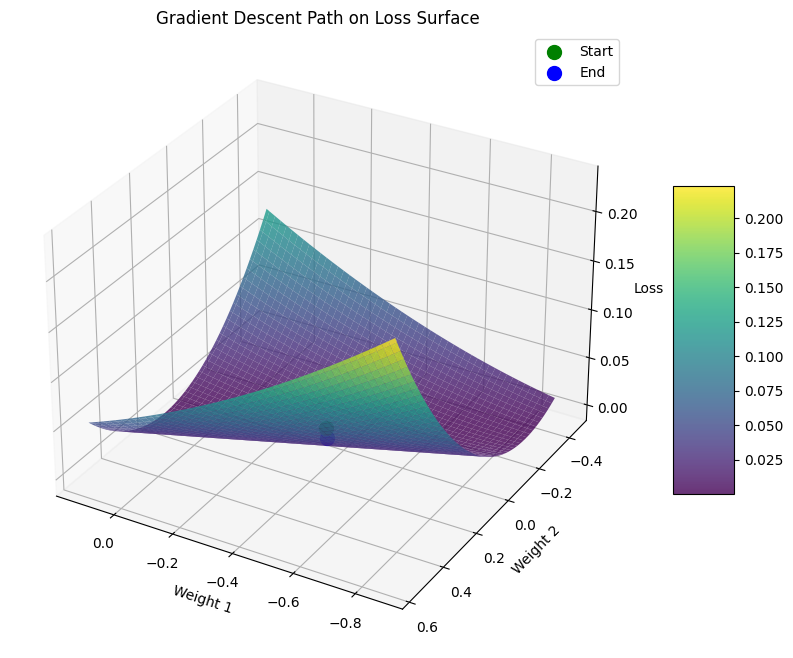

In [33]:
from matplotlib import cm

# Define the weight ranges for creating the loss surface
w1_range = np.linspace(param_updates[:, 0].min() - 0.5, param_updates[:, 0].max() + 0.5, 100)
w2_range = np.linspace(param_updates[:, 1].min() - 0.5, param_updates[:, 1].max() + 0.5, 100)
w1, w2 = np.meshgrid(w1_range, w2_range)

# Create the loss surface
loss_surface = np.zeros_like(w1)
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        model.layers[0].weight[0, 0] = w1[i, j]
        model.layers[0].weight[0, 1] = w2[i, j]
        y_pred = model(X)
        loss_surface[i, j] = mse_loss(y_pred, y_true).item()

# Restore the original weights
model.layers[0].weight[0, 0] = param_updates[0, 0]
model.layers[0].weight[0, 1] = param_updates[0, 1]

# Create a larger 3D plot with the loss surface and gradient descent path
fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Plot the loss surface
surface = ax.plot_surface(w1, w2, loss_surface, cmap=cm.viridis, edgecolor='none', alpha=0.8)

# Add the gradient descent path
ax.plot(param_updates[:, 0], param_updates[:, 1], param_updates[:, 2], color='r', marker='o')

# Mark the starting point
ax.scatter(param_updates[0, 0], param_updates[0, 1], param_updates[0, 2], color='g', s=100, label='Start')
# Mark the ending point
ax.scatter(param_updates[-1, 0], param_updates[-1, 1], param_updates[-1, 2], color='b', s=100, label='End')

# Add color bar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

# Labels and title
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Loss')
ax.set_title('Gradient Descent Path on Loss Surface')
ax.legend()

# Set the view angle for better visualization
ax.view_init(elev=30, azim=120)  # Lower elevation angle for a more horizontal view

plt.show()